In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# problem 001
tf.constant([1,2,3,4], shape=(2,2), dtype=tf.float32)

In [ ]:
# problem 002
tf.Variable(np.array([[1,2,3], 
                      [4,5,6]]))

In [ ]:
# problem 003
t1 = tf.constant([0, 1, 2, 3, 4, 5, 6, 7])

t2 = tf.constant([[0, 1, 2, 3, 4],
                [5, 6, 7, 8, 9],
                [10, 11, 12, 13, 14],
                [15, 16, 17, 18, 19]])

t3 = tf.constant([[[1, 3, 5, 7],
                   [9, 11, 13, 15]],
                  [[17, 19, 21, 23],
                   [25, 27, 29, 31]]
                  ])

print('t1', t1[1:4])
print('t2', t2[:3, 1:3])
print(t3[1:2, 1:2, 0:2])
# print(tf.slice(t3, begin=[1, 1, 0], size=[1, 1, 2]))

In [ ]:
# problem 004
tf.ones(shape=(3, 16, 16))

In [ ]:
# problem 005
t1 = tf.zeros(shape=(3,16,16))
t2 = tf.ones(shape=(3,16,16))
t3 = 1+tf.ones(shape=(3,16,16))
# t3 = tf.fill([3, 16, 16], 2.)
#print('t1', t1, '\n')
#print('t2', t2, '\n')
#print('t3', t3, '\n')
tf.stack([t1, t2, t3], axis=0)

In [ ]:
# problem 006
tf.random.uniform(shape=(8, 3,16,16), minval=0, maxval=255, dtype=tf.int32)

In [ ]:
# problem 007
tf.random.normal(shape=(8,3,16,16))

In [ ]:
# problem 008
# load MPG dataset
# pip install -q seaborn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
raw_dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
# problem 008
dataset = tf.Variable(raw_dataset)
print('sum of columns', tf.reduce_sum(dataset, axis=0))
print('mean of columns', tf.reduce_mean(dataset, axis=0))
max_horsepower_index = tf.argmax(dataset[:,3], axis=0)
print('max_horsepower_index', max_horsepower_index)
print('maximum horsepower', dataset[max_horsepower_index,3])
print('minimum MPG', tf.reduce_min(dataset[:,0]))

sum of columns tf.Tensor(
[   9358.8    2171.    76983.5       nan 1182229.     6196.1   30252.
     626. ], shape=(8,), dtype=float64)
mean of columns tf.Tensor([  23.515    5.455  193.426      nan 2970.425   15.568   76.01     1.573], shape=(8,), dtype=float64)
max_horsepower_index tf.Tensor(116, shape=(), dtype=int64)
maximum horsepower tf.Tensor(230.0, shape=(), dtype=float64)
minimum MPG tf.Tensor(9.0, shape=(), dtype=float64)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(32, 32, 3)


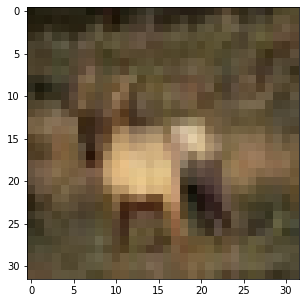

In [ ]:
# problem 009
# load image dataset
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(x_train[0,].shape)
image = x_train[3,]

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)

In [ ]:
# problem 009
tf.reduce_mean(image, axis=[0,1])

# image_r = image[:,:,0]
# image_g = image[:,:,1]
# image_b = image[:,:,2]

# print('mean of channel r', tf.reduce_mean(image_r)) # 99
# print('mean of channel g', tf.reduce_mean(image_g)) # 83
# print('mean of channel b', tf.reduce_mean(image_b)) # 57

<tf.Tensor: shape=(3,), dtype=uint8, numpy=array([99, 83, 57], dtype=uint8)>

mean of all channels tf.Tensor(
[[21 30 31 ... 60 65 69]
 [24 26 23 ... 77 78 67]
 [28 30 46 ... 73 87 75]
 ...
 [69 73 70 ... 87 78 69]
 [70 72 75 ... 69 65 71]
 [77 74 73 ... 43 52 61]], shape=(32, 32), dtype=uint8)


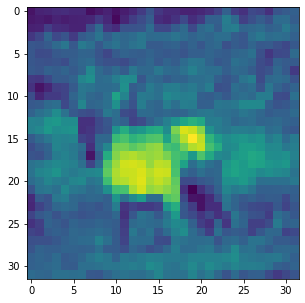

In [ ]:
# problem 009
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(image)
merged_image = tf.reduce_mean(image, axis=2)
print('mean of all channels', merged_image)
ax.imshow(merged_image)